jacobi
[[ 36.86219905]
 [ 33.78120331]
 [ 30.69506606]
 [ 27.78432976]
 [ 24.86937699]
 [ 22.22811707]
 [ 19.58349589]
 [ 17.28120441]
 [ 14.97631187]
 [ 13.04853758]
 [ 11.11881183]
 [  9.56830472]
 [  8.01637976]
 [  6.8186455 ]
 [  5.61991467]
 [  4.73146536]
 [  3.84233906]
 [  3.20970533]
 [  2.57662752]
 [  2.14447811]
 [  1.71204762]
 [  1.42937077]
 [  1.14652233]
 [  0.97053157]
 [  0.79443973]
 [  0.69247859]
 [  0.59045968]
 [  0.54058123]
 [  0.49066998]
 [  0.4817321 ]
 [  0.4727741 ]
 [  0.5048496 ]
 [  0.53690884]
 [  0.62260973]
 [  0.7082905 ]
 [  0.87528069]
 [  1.04223809]
 [  1.3367744 ]
 [  1.63125294]
 [  2.12206832]
 [  2.61278263]
 [  3.39406765]
 [  4.1751811 ]
 [  5.36695829]
 [  6.55845441]
 [  8.30247322]
 [ 10.04604795]
 [ 12.49567175]
 [ 14.94461856]
 [ 18.24816777]
 [ 21.5507204 ]
 [ 25.82932895]
 [ 30.10651965]
 [ 35.42944754]
 [ 40.75042397]
 [ 47.11240479]
 [ 53.47178454]
 [ 60.77774083]
 [ 68.08033586]
 [ 76.14217939]
 [ 84.19980645]
 [ 92.74795019]
 

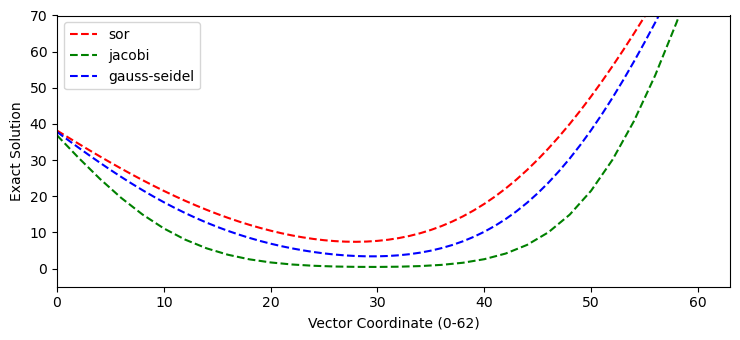

In [1]:
import numpy as np 
import sys
import matplotlib.pyplot as plt
import scipy 

# sor
def sor(A, b, xn, w):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]

        xnp1[j] = w*(b[j] - sum)/A[j, j] + (1-w)*xn[j]
    return xnp1

# Jacobi
def jacobi(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k != j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1

# Gauss Seidel
def gsMethod(A, b, xn):
    N = len(xn)
    xnp1 = np.zeros(xn.shape)
    for j in range(0, N):
        sum = 0
        for k in range(0, N):
            if k < j:
                sum = sum + A[j, k]*xnp1[k]
            elif k > j:
                sum = sum + A[j, k]*xn[k]
        xnp1[j] = (b[j] - sum)/A[j, j]
    return xnp1

# defining function for A matrix diagonal elements (u_j coefficients)
# j is iteration, e is epsilon value
# checked this with wolfram and got matching values
def epsA(j, e):
    c = (-2.0 - (((50.0/64.0)**2.0)*(0.01)*e*np.sin((np.pi*j)/32.0)))
    return c

# defining function for b matrix long equation
# j is iteration, e is epsilon value
# checked this with wolfram and got matching values
def epsb(j, e):
    return (-(50.0/64.0)**2.0)*0.01*(1+e*np.sin((j*np.pi)/32.0)*100.0)

# create 63x63 matrix
A = np.zeros((63,63))
Adiag = np.zeros((63,63))

# create and fill 63 column array
d = np.arange(62.0)
d.fill(1.0)


#create new arrays with upper and lower diagonals of 1
x1 = np.diag(d, 1)
x2 = np.diag(d, -1)

# add x1 + x2 to get 1s on on upper/lower diagonal
A = x1 + x2 

# assign epsA function to diagonal 
for j in range(0,63):
    A[j][j] = epsA(j+1, 0)
    #Adiag[j][j] = epsA(j+1, 0)

#AdiagInv = np.linalg.inv(Adiag)

#print(A)
#print()

# create 63x1 b matrix
b = np.zeros((63,1))

# add epsb values to b with a chosen epsilon for now
for i in range(0, 63):
    b[i] = epsb(i+1, 0)

# substract off constants u0 and uL
b[0] = b[0] - 40
b[62] = b[62] - 110 

# b matrix should be correct 
#print(b)
#print()

lu = (-x1) + (-x2)

#Rj = np.matmul(AdiagInv,lu)

xn = np.zeros((63,1))

#print()
#print(Rj)
#print()
#print()
#print(np.linalg.eigh(Rj))

def iterJ(A, b, xn):
    A = A
    xn = xn
    xn1 = xn
    b = b

    for i in range(100):
        xn = jacobi(A, b, xn)
        if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
            break
        xn1 = xn
    return xn

def iterGS(A,b,xn):
    A = A
    xn = xn
    xn1 = xn
    b = b

    for i in range(100):
        xn = gsMethod(A, b, xn)
        if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
            break
        xn1 = xn
    return xn

def iterSOR(A,b,xn,w):
    A = A
    xn = xn
    xn1 = xn
    b = b

    for i in range(100):
        xn = sor(A, b, xn, w)
        if(np.linalg.norm((xn1 - xn), np.inf) < 5*10**-6):
            break
        xn1 = xn
    return xn


y1 = iterJ(A, b, xn)
y2 = iterGS(A,b,xn)
y3 = iterSOR(A,b,xn,1.17)


# graph stuff
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#create x values
x1 = np.linspace(0,62,63)
x2 = x1
x3 = x1

print('jacobi')
print(y1)
print()
print('gs')
print(y2)
print()
print("sor")
print(y3)

# plot functions
plt.plot(x3, y3, '--', color = "red", label = 'sor')
plt.plot(x1, y1, '--', color = "green",label = 'jacobi')
plt.plot(x2, y2, '--',  color = "blue",label = 'gauss-seidel')
plt.legend()

#label axis
plt.xlabel("Vector Coordinate (0-62)")
plt.ylabel("Exact Solution")

# constrain graph window 
plt.xlim([0, 63])
plt.ylim([-5, 70])

# display graph
plt.show()

